Cluster 1:
[[  41.          800.57782426]
 [  56.          990.43728313]
 [  35.          637.3332289 ]
 [  43.          662.66637529]
 [  26.          704.16804085]
 [  27.          887.09968958]
 [  69.          604.24003278]
 [  23.         1094.17130159]
 [  36.          705.28100966]
 [  69.          649.8715766 ]
 [  19.          613.01514907]
 [  49.          572.63097269]
 [  68.          949.53821937]
 [  18.          665.13020662]
 [  54.          853.36090761]
 [  33.         1052.51632566]
 [  60.          905.32459226]
 [  19.          672.99215168]
 [  59.          651.1474537 ]
 [  56.          914.6605318 ]
 [  64.          666.73641932]
 [  30.          919.69502732]
 [  38.          798.36755309]
 [  29.          928.143358  ]
 [  33.          873.64826473]
 [  66.          961.73109709]]
Cluster 2:
[[ 54.         473.50648719]
 [ 42.         284.49242401]
 [ 30.         282.586975  ]
 [ 42.         174.45680528]
 [ 55.         328.37346631]
 [ 31.         325.5826660

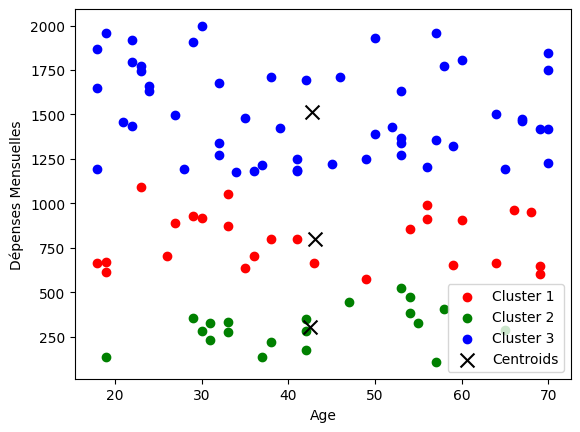

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Collecte des données (simulons des données de clients)
n_clients = 100

# Générer des âges aléatoires entre 18 et 70 ans
ages = np.random.randint(18, 71, size=n_clients)

# Générer des dépenses mensuelles aléatoires entre 100 et 2000
depenses_mensuelles = np.random.uniform(100, 5000, size=n_clients)
data = np.column_stack((ages, depenses_mensuelles))

# Étape 2 : Définir le nombre de clusters (k) et initialiser les centroïdes de manière aléatoire
k = 3
np.random.seed(0)
centroids = data[np.random.choice(data.shape[0], k, replace=False)]

# Étape 3 : Définir le nombre d'itérations
max_iterations = 100

for iteration in range(max_iterations):
    # Étape 4 : Attribution de chaque point au centroïde le plus proche
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Étape 5 : Recalculer les nouveaux centroïdes comme la moyenne des points dans chaque cluster
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

    # Étape 6 : Vérifier si les centroïdes ont convergé (peu ou pas de changements)
    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids

# Étape 7 : Attribuer chaque point à un cluster
for i in range(k):
    cluster_points = data[labels == i]
    print(f"Cluster {i + 1}:")
    print(cluster_points)

# Étape 8 : Visualisation des clusters
colors = ['r', 'g', 'b']
for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.scatter(centroids[:, 0], centroids[:, 1,], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Dépenses Mensuelles')
plt.legend()
plt.show()
